In [564]:
import pandas as pd
import numpy as np
import torch 
from torch import nn


In [565]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [566]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [567]:
df.columns = [1,2,3,4,5,6,7,8,9]

In [568]:
df

,1,2,3,4,5,6,7,8,9
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [569]:
from sklearn.utils import resample
minority = df[df[9] == 1]
majority = df[df[9] == 0]
majority = resample(majority,n_samples=268,replace=False)
df_new = pd.concat([minority,majority])

In [570]:
df_new

,1,2,3,4,5,6,7,8,9
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
320,4,129,60,12,231,27.5,0.527,31,0
67,2,109,92,0,0,42.7,0.845,54,0
190,3,111,62,0,0,22.6,0.142,21,0
403,9,72,78,25,0,31.6,0.280,38,0


In [571]:
X = df_new[[2,3,4,5,6,7]]
X = X.to_numpy()

In [572]:
y = df_new[9]
y = y.to_numpy()

In [573]:
X.shape, y.shape

((536, 6), (536,))

In [574]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [575]:
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)


In [576]:
X_train.shape, X_test.shape

(torch.Size([428, 6]), torch.Size([108, 6]))

In [577]:
X_test = X_test.to(torch.float32)
y_test = y_test.to(torch.float32)
X_test.requires_grad = True
y_test.requires_grad = True

In [578]:
X_train = X_train.to(torch.float32)
y_train = y_train.to(torch.float32)
X_train.requires_grad = True
y_train.requires_grad = True

In [579]:
class Model0(nn.Module):
    def __init__(self,hidden_features):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(in_features=6,out_features=hidden_features),
            nn.Linear(in_features=hidden_features,out_features=hidden_features),
            nn.Linear(in_features=hidden_features,out_features=hidden_features),
            nn.Linear(in_features=hidden_features,out_features=hidden_features),
            nn.Linear(in_features=hidden_features,out_features=hidden_features),
            nn.Linear(in_features=hidden_features,out_features=hidden_features),
            nn.Linear(in_features=hidden_features,out_features=hidden_features),
            nn.Linear(in_features=hidden_features,out_features=1)
        )

    def forward(self,x):
        return self.layer(x)
    
first_model = Model0(4)

In [580]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [581]:
torch.manual_seed(42)

loss_fn = nn.BCEWithLogitsLoss()
optimiser = torch.optim.Adam(params=first_model.parameters(),lr = 1e-3)
losses = []
epochs = 1000
for epoch in range(epochs):
    first_model.train()
    y_pred = first_model(X_train).squeeze()
    y_pred_labels = torch.round(torch.sigmoid(y_pred)).to(torch.float32)
    loss = loss_fn(y_pred,y_train)
    losses.append(loss.item())
    acc = accuracy_fn(y_train,y_pred_labels)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    first_model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = first_model(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.91354, Accuracy: 41.12% | Test loss: 0.80377, Test acc: 41.67%
Epoch: 100 | Loss: 0.64230, Accuracy: 66.36% | Test loss: 0.63623, Test acc: 70.37%
Epoch: 200 | Loss: 0.61021, Accuracy: 65.89% | Test loss: 0.58859, Test acc: 67.59%
Epoch: 300 | Loss: 0.59240, Accuracy: 67.76% | Test loss: 0.57147, Test acc: 71.30%
Epoch: 400 | Loss: 0.57017, Accuracy: 72.43% | Test loss: 0.55084, Test acc: 74.07%
Epoch: 500 | Loss: 0.54628, Accuracy: 72.20% | Test loss: 0.53094, Test acc: 75.00%
Epoch: 600 | Loss: 0.53336, Accuracy: 73.36% | Test loss: 0.52328, Test acc: 76.85%
Epoch: 700 | Loss: 0.53054, Accuracy: 72.90% | Test loss: 0.52497, Test acc: 76.85%
Epoch: 800 | Loss: 0.52912, Accuracy: 73.36% | Test loss: 0.52761, Test acc: 78.70%
Epoch: 900 | Loss: 0.52860, Accuracy: 73.36% | Test loss: 0.52960, Test acc: 78.70%


Text(0.5, 1.0, 'Loss vs Epochs')

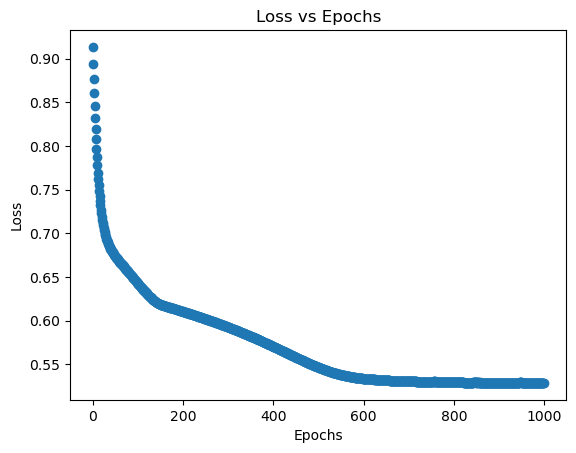

In [582]:
import matplotlib.pyplot as plt

plt.scatter(range(epochs),losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")

In [583]:
torch.save(first_model.state_dict(), 'firstmodel.pth')